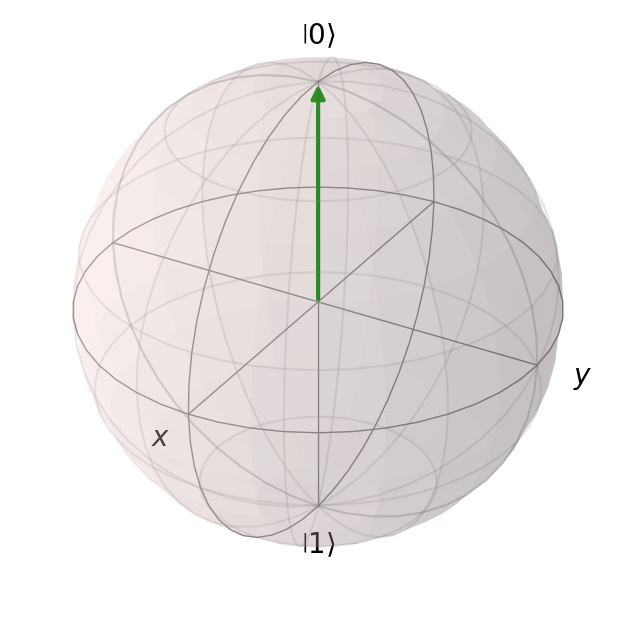

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import simpledialog, messagebox
from qutip import Bloch, Qobj
import sympy as sp

class QubitSimulator:
    def __init__(self, master):
        self.master = master
        self.master.title("Qubit State Visualizer - (created by Inderpal Suthar)")
        self.master.configure(bg="#2E2E2E")

        self.state = np.array([1,0])  # Initial state |0>
        self.history = []

        self.setup_gui()
        self.update_bloch_sphere()

    def setup_gui(self):
        # Create a PanedWindow to organize the layout
        self.paned_window = tk.PanedWindow(self.master, orient=tk.HORIZONTAL)
        self.paned_window.pack(fill=tk.BOTH, expand=True)

        # Left Panel for buttons and timeline
        self.left_panel = tk.Frame(self.paned_window, width=300, bg="#2E2E2E")
        self.paned_window.add(self.left_panel)

        # Menu Bar
        menubar = tk.Menu(self.master, bg="#2E2E2E", fg="white")
        self.master.config(menu=menubar)

        file_menu = tk.Menu(menubar, tearoff=0, bg="#2E2E2E", fg="white")
        menubar.add_cascade(label="Menu", menu=file_menu)
        file_menu.add_command(label="Single Qubit Gate Operation", command=self.show_gate_challenge, background="#3A3A3A", foreground="white")
        file_menu.add_command(label="Mulitple Qubit Gate Operation",command=self.mulitple_qubit_gate_challenge,background="#3A3A3A", foreground="white")
        file_menu.add_command(label="Pulse Challenge", command=self.show_pulse_challenge, background="#3A3A3A", foreground="white")
        file_menu.add_separator()
        file_menu.add_command(label="Exit", command=self.master.quit, background="#3A3A3A", foreground="white")

        help_menu = tk.Menu(menubar, tearoff=0, bg="#2E2E2E", fg="white")
        menubar.add_cascade(label="Help", menu=help_menu)
        help_menu.add_command(label="For applying dagger", command=self.dagger_help, background="#3A3A3A", foreground="white")

        # Horizontal Button Frame
        self.button_frame = tk.Frame(self.left_panel, bg="#2E2E2E")
        self.button_frame.pack(pady=10, padx=10)

        # Gate Buttons with Colors, Size Adjustments, and Rounded Edges
        self.x_button = tk.Button(self.button_frame, text="X-Gate", command=self.apply_x_gate, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=12, height=2, padx=10, pady=5)
        self.x_button.grid(row=0, column=0, padx=5, pady=5, sticky="ew")

        self.y_button = tk.Button(self.button_frame, text="Y-Gate", command=self.apply_y_gate, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=12, height=2, padx=10, pady=5)
        self.y_button.grid(row=0, column=1, padx=5, pady=5, sticky="ew")

        self.z_button = tk.Button(self.button_frame, text="Z-Gate", command=self.apply_z_gate, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=12, height=2, padx=10, pady=5)
        self.z_button.grid(row=0, column=2, padx=5, pady=5, sticky="ew")

        self.h_button = tk.Button(self.button_frame, text="Hadamard Gate", command=self.apply_h_gate, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=18, height=2, padx=10, pady=5)
        self.h_button.grid(row=1, column=0, padx=5, pady=5, sticky="ew")

        self.phase_button = tk.Button(self.button_frame, text="S-Gate", command=self.apply_phase_gate, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=12, height=2, padx=10, pady=5)
        self.phase_button.grid(row=1, column=1, padx=5, pady=5, sticky="ew")

        self.t_button = tk.Button(self.button_frame, text="T-Gate", command=self.apply_t_gate, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=12, height=2, padx=10, pady=5)
        self.t_button.grid(row=1, column=2, padx=5, pady=5, sticky="ew")

        self.x_rot_button = tk.Button(self.button_frame, text="X-Rotation Gate", command=self.apply_x_rotation_gate, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=18, height=2, padx=10, pady=5)
        self.x_rot_button.grid(row=2, column=0, padx=5, pady=5, sticky="ew")

        self.y_rot_button = tk.Button(self.button_frame, text="Y-Rotation Gate", command=self.apply_y_rotation_gate, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=18, height=2, padx=10, pady=5)
        self.y_rot_button.grid(row=2, column=1, padx=5, pady=5, sticky="ew")

        self.z_rot_button = tk.Button(self.button_frame, text="Z-Rotation Gate", command=self.apply_z_rotation_gate, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=18, height=2, padx=10, pady=5)
        self.z_rot_button.grid(row=2, column=2, padx=5, pady=5, sticky="ew")

        X, n = sp.symbols('X n')
        self.x_nth_root_button = tk.Button(self.button_frame, text=sp.pretty(X**(1/n)), command=self.apply_x_nth_root_gate, bg="#1E3A5F", fg="white", font=('Arial',10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=18, height=2, padx=10, pady=5)
        self.x_nth_root_button.grid(row=3, column=0, padx=5, pady=5, sticky="ew")

        Y, n = sp.symbols('Y n')
        self.y_nth_root_button = tk.Button(self.button_frame, text=sp.pretty(Y**(1/n)), command=self.apply_y_nth_root_gate, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=18, height=2, padx=10, pady=5)
        self.y_nth_root_button.grid(row=3, column=1, padx=5, pady=5, sticky="ew")

        Z, n = sp.symbols('Z n')
        self.z_nth_root_button = tk.Button(self.button_frame, text= sp.pretty(Z**(1/n)), command=self.apply_z_nth_root_gate, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=18, height=2, padx=10, pady=5)
        self.z_nth_root_button.grid(row=3, column=2, padx=5, pady=5, sticky="ew")

        self.u_button = tk.Button(self.button_frame, text= "U Gate", command=self.u_gate, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=18, height=2, padx=10, pady=5)
        self.u_button.grid(row=4, column=0, padx=5, pady=5, sticky="ew")
        
        # Undo and Clear Buttons with Rounded Edges
        self.undo_button = tk.Button(self.button_frame, text="Undo", command=self.undo_last_operation, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=12, height=2, padx=10, pady=5)
        self.undo_button.grid(row=5, column=1, padx=5, pady=5, sticky="ew")

        self.clear_button = tk.Button(self.button_frame, text="Clear", command=self.clear_timeline, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=12, height=2, padx=10, pady=5)
        self.clear_button.grid(row=5, column=2, padx=5, pady=5, sticky="ew")

        self.global_button = tk.Button(self.button_frame, text="Global-Phase", command=self.global_phase, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=12, height=2, padx=10, pady=5)
        self.global_button.grid(row=5, column=0, padx=5, pady=5, sticky="ew")

        self.random_norm_button = tk.Button(self.button_frame, text="Random-Norm-State", command=self.random_norm_state, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=12, height=2, padx=10, pady=5)
        self.random_norm_button.grid(row=4, column=1, padx=5, pady=5, sticky="ew")

        self.dagger = tk.Button(self.button_frame, text="Dagger", command=self.dagger, bg="#1E3A5F", fg="white", font=('Arial', 10, 'bold'), relief="groove", bd=2, highlightbackground="black", width=12, height=2, padx=10, pady=5)
        self.dagger.grid(row=4, column=2, padx=5, pady=5, sticky="ew")        

        # Timeline Section
        self.timeline_label = tk.Label(self.left_panel, text="Operation Timeline", font=('Arial', 12, 'bold'), bg="#2E2E2E", fg="white")
        self.timeline_label.pack(pady=10)

        self.timeline_text = tk.Text(self.left_panel, width=60, height=50, font=('Arial', 10), bg="#3A3A3A", fg="white")
        self.timeline_text.pack(pady=10)
        self.timeline_text.tag_configure('bold', font=('Arial', 10, 'bold'))

        # Right Panel for Bloch Sphere
        self.right_panel = tk.Frame(self.paned_window, bg='black')
        self.paned_window.add(self.right_panel, stretch="always")

        self.fig = plt.figure(figsize=(6, 6))  # Adjust the figure size here
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.ax.set_xlim([-1, 1])
        self.ax.set_ylim([-1, 1])
        self.ax.set_zlim([-1, 1])
        self.ax.view_init(azim=60, elev=30)  # Set view angle to focus on the upper quadrant

        self.bloch_sphere = Bloch(fig=self.fig)
        self.bloch_sphere.add_states([Qobj(self.state)])

        self.canvas = FigureCanvasTkAgg(self.fig, master=self.right_panel)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    def update_bloch_sphere(self):
        self.bloch_sphere.clear()
        self.plot_state(self.state)
        self.bloch_sphere.render()
        self.canvas.draw()

    def plot_state(self, state):
        psi = Qobj(state)
        self.bloch_sphere.add_states([psi])

    def apply_x_gate(self):
        x_gate = np.array([
            [0, 1],
            [1, 0]
        ])
        self.state = np.dot(x_gate, self.state)
        self.history.append(('X-Gate', self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()

    def apply_y_gate(self):
        y_gate = np.array([
            [0, -1j],
            [1j, 0]
        ])
        self.state = np.dot(y_gate, self.state)
        self.history.append(('Y-Gate', self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()
        
    def apply_z_gate(self):
        z_gate = np.array([
            [1, 0],
            [0, -1]
        ])
        self.state = np.dot(z_gate, self.state)
        self.history.append(('Z-Gate', self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()

    def apply_h_gate(self):
        h_gate = (1/np.sqrt(2)) * np.array([
            [1, 1],
            [1, -1]
        ])
        self.state = np.dot(h_gate, self.state)
        self.history.append(('H-Gate', self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()

    def u_gate(self):
        try:
            a, b, c, d = [complex(num) for num in simpledialog.askstring("Input", "Enter matrix elements row-wise with space (e.g., 1+2j 3-4j 5 6j):").split()]
        except (ValueError, TypeError) as e:
            messagebox.showerror(f"Invalid input: {e}. Please ensure you enter valid complex numbers separated by spaces.")
        u_gate = np.array([
            [a, b],
            [c, d]
        ])
        self.state = np.dot(u_gate, self.state)
        self.history.append(('U-Gate', self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()

    def apply_x_rotation_gate(self):
        angle = simpledialog.askfloat("Input", "Enter rotation angle (degrees):", minvalue=-360, maxvalue=360)
        if angle is None:
            return
        angle_rad = np.deg2rad(angle)  # Convert degrees to radians
        x_rot_gate = np.array([
            [np.cos(angle_rad / 2), -1j * np.sin(angle_rad / 2)],
            [-1j * np.sin(angle_rad / 2), np.cos(angle_rad / 2)]
        ])
        self.state = np.dot(x_rot_gate, self.state)
        self.history.append((f"Rx Gate with angle(degrees): {angle} ", self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()

    def apply_y_rotation_gate(self):
        angle = simpledialog.askfloat("Input", "Enter rotation angle (degrees):", minvalue=-360, maxvalue=360)
        if angle is None:
            return
        angle_rad = np.deg2rad(angle)  # Convert degrees to radians
        y_rot_gate = np.array([
            [np.cos(angle_rad / 2), -np.sin(angle_rad / 2)],
            [np.sin(angle_rad / 2), np.cos(angle_rad / 2)]
        ])
        self.state = np.dot(y_rot_gate, self.state)
        self.history.append((f"Ry Gate with angle(degrees): {angle} ", self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()

    def apply_z_rotation_gate(self):
        angle = simpledialog.askfloat("Input", "Enter rotation angle (degrees):", minvalue=-360, maxvalue=360)
        if angle is None:
            return
        angle_rad = np.deg2rad(angle)  # Convert degrees to radians
        z_rot_gate = np.array([
            [np.exp(-1j * angle_rad / 2), 0],
            [0, np.exp(1j * angle_rad / 2)]
        ])
        self.state = np.dot(z_rot_gate, self.state)
        self.history.append((f"Rz Gate with angle(degrees): {angle} ", self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()

    def apply_x_nth_root_gate(self):
        n = simpledialog.askfloat("Input","Enter value of n:")
        angle_rad = np.deg2rad(90)  # Convert degrees to radians
        theta=angle_rad/float(n)
        x_nth_root_gate = np.array([
            [np.exp(1j * theta)*(np.cos(theta)),-1j * np.sin(theta) * (np.exp(1j * theta))],
            [-1j * np.sin(theta) * (np.exp(1j * theta)), (np.exp(1j * theta))* np.cos(theta)]
        ])
        self.state = np.dot(x_nth_root_gate, self.state)
        self.history.append((f"x^(1/n) Gate with n: {n} ", self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()


    def apply_y_nth_root_gate(self):
        n = simpledialog.askfloat("Input","Enter value of n:")
        angle_rad = np.deg2rad(90)  # Convert degrees to radians
        theta=angle_rad/float(n)
        y_nth_root_gate = np.exp(1j * theta)*np.array([
            [np.cos(theta),-1*np.sin(theta)],
            [np.sin(theta) ,np.cos(theta)]
        ])
        self.state = np.dot(y_nth_root_gate, self.state)
        self.history.append((f"y^(1/n) Gate with n: {n} ", self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()

    def apply_z_nth_root_gate(self):
        n = simpledialog.askfloat("Input","Enter value of n:")
        angle_rad = np.deg2rad(180)  # Convert degrees to radians
        theta=angle_rad/float(n)
        z_nth_root_gate = np.array([
            [1,0],
            [0,np.exp(1j*theta)]
        ])
        self.state = np.dot(z_nth_root_gate, self.state)
        self.history.append((f"z^(1/n) Gate with n: {n} ", self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()

    def apply_phase_gate(self):
        phase = simpledialog.askfloat("Input", "Enter phase angle (degrees):", minvalue=-360, maxvalue=360)
        if phase is None:
            return
        phase_rad = np.deg2rad(phase)  # Convert degrees to radians
        phase_gate = np.array([
            [1, 0],
            [0, np.exp(1j * phase_rad)]
        ])
        self.state = np.dot(phase_gate, self.state)
        self.history.append((f"Phase Gate with phase(degrees): {phase} ", self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()

    def apply_t_gate(self):
        t_gate = np.array([
            [1, 0],
            [0, np.exp(1j * np.pi / 4)]
        ])
        self.state = np.dot(t_gate, self.state)
        self.history.append(('T-Gate', self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()

    def global_phase(self):
        phase=simpledialog.askfloat("Input", "Enter phase angle (degrees):", minvalue=-360, maxvalue=360)
        if phase is None:
            return
        phase_rad = np.deg2rad(phase)
        global_phase=np.exp(1j*phase_rad)
        self.state = global_phase * self.state
        self.history.append((f"Global Phase change by: {phase} ", self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()

    def random_norm_state(self):
        random_array = np.random.rand(2)    
        norm = np.sqrt(np.sum(random_array**2))    
        normalized_array = random_array / norm
        self.state=normalized_array
        self.history.append(("State replaced with random normalized state", self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()    

    def dagger(self):
        gate=simpledialog.askstring("Input","Enter the gate symbol")
        valid_gates = ["X", "Y", "Z", "S", "T", "H", "Rx", "Ry", "Rz", "Rxn", "Ryn", "Rzn"]
        if gate not in valid_gates:
            messagebox.showinfo("Error", "This is not the right Input, see Help in Menubar")
            return 
        elif gate=="X":
            x_gate = np.array([[0, 1],[1, 0]])
            self.state = np.dot(x_gate, self.state)
        elif gate=="Y":
            y_gate = np.array([[0, -1j],[1j, 0]])
            self.state = np.dot(y_gate, self.state)
        elif gate=="Z":
            z_gate = np.array([[1, 0],[0, -1]])
            self.state = np.dot(z_gate, self.state)
        elif gate=="Rx":
            angle = simpledialog.askfloat("Input", "Enter rotation angle (degrees):", minvalue=-360, maxvalue=360)
            if angle is None:
                return
            angle_rad = -1*np.deg2rad(angle)  # Convert degrees to radians
            x_rot_gate = np.array([
                [np.cos(angle_rad / 2), -1j * np.sin(angle_rad / 2)],
                [-1j * np.sin(angle_rad / 2), np.cos(angle_rad / 2)]
            ])
            self.state = np.dot(x_rot_gate, self.state)
        elif gate=="Ry":
            angle = simpledialog.askfloat("Input", "Enter rotation angle (degrees):", minvalue=-360, maxvalue=360)
            if angle is None:
                return
            angle_rad = (-1)*np.deg2rad(angle)  # Convert degrees to radians
            y_rot_gate = np.array([
                [np.cos(angle_rad / 2), -np.sin(angle_rad / 2)],
                [np.sin(angle_rad / 2), np.cos(angle_rad / 2)]
            ])
            self.state = np.dot(y_rot_gate, self.state)
        elif gate=="Rz":
            angle = simpledialog.askfloat("Input", "Enter rotation angle (degrees):", minvalue=-360, maxvalue=360)
            if angle is None:
                return
            angle_rad = (-1)*np.deg2rad(angle)  # Convert degrees to radians
            z_rot_gate = np.array([
                [np.exp(-1j * angle_rad / 2), 0],
                [0, np.exp(1j * angle_rad / 2)]
            ])
            self.state = np.dot(z_rot_gate, self.state)
        elif gate=="H":
            h_gate = (1/np.sqrt(2)) * np.array([
            [1, 1],
            [1, -1]
            ])
            self.state = np.dot(h_gate, self.state)
        elif gate=="S":
            phase = simpledialog.askfloat("Input", "Enter phase angle (degrees):", minvalue=-360, maxvalue=360)
            if phase is None:
                return
            phase_rad =(-1)*np.deg2rad(phase)  # Convert degrees to radians
            phase_gate = np.array([
                [1, 0],
                [0, np.exp(1j * phase_rad)]
            ])
            self.state = np.dot(phase_gate, self.state)
        elif gate=="T":
            t_dag_gate = np.array([[1, 0],[0, np.exp(-1j * np.pi / 4)]])
            self.state = np.dot(t_dag_gate, self.state)
        elif gate =="Rxn":
            n = simpledialog.askfloat("Input","Enter value of n:")
            angle_rad = np.deg2rad(90)  # Convert degrees to radians
            theta=(-1)*angle_rad/float(n)
            x_nth_root_gate = np.array([
                [np.exp(1j * theta)*(np.cos(theta)),-1j * np.sin(theta) * (np.exp(1j * theta))],
                [-1j * np.sin(theta) * (np.exp(1j * theta)), (np.exp(1j * theta))* np.cos(theta)]
            ])
            self.state = np.dot(x_nth_root_gate, self.state)
        elif gate =="Ryn":
            n = simpledialog.askfloat("Input","Enter value of n:")
            angle_rad = np.deg2rad(90)  # Convert degrees to radians
            theta=(-1)*angle_rad/float(n)
            y_nth_root_gate = np.exp(1j * theta)*np.array([
                [np.cos(theta),-1*np.sin(theta)],
                [np.sin(theta) ,np.cos(theta)]
            ])
            self.state = np.dot(y_nth_root_gate, self.state)
        elif gate == "Rzn":
            n = simpledialog.askfloat("Input","Enter value of n:")
            angle_rad = np.deg2rad(180)  # Convert degrees to radians
            theta=(-1)*angle_rad/float(n)
            z_nth_root_gate = np.array([
                [1,0],
                [0,np.exp(1j*theta)]
            ])
            self.state = np.dot(z_nth_root_gate, self.state)
        self.history.append((f"{gate} dagger ", self.state.copy()))  # Store operation with state
        self.update_bloch_sphere()
        self.update_timeline()        

    def undo_last_operation(self):
        if self.history:
            last_operation= self.history.pop()
            self.state = [[1],[0]] if not (self.history) else self.history[-1][1]
            self.update_bloch_sphere()
            self.update_timeline()
            messagebox.showinfo("Undo", f"Undid {last_operation[0]}")
        else:
            messagebox.showwarning("Undo", "No operations to undo")            

    def clear_timeline(self):
        self.history = []
        self.state = np.array([1, 0])  # Reset to initial state
        self.update_bloch_sphere()
        self.timeline_text.delete(1.0, tk.END)
        messagebox.showinfo("Clear", "Timeline and state cleared")

    def update_timeline(self):
        self.timeline_text.delete(1.0, tk.END)
        for operation, state in self.history:
            # Ensure state is a NumPy array and convert to list if necessary
            if isinstance(state, np.ndarray):
                state = state.tolist()
            # Format state elements directly
            state_str = f"[{state[0]:.2f}, {state[1]:.2f}]"  # Format state for display
            self.timeline_text.insert(tk.END, f"{operation} -> State: {state_str}\n", ('bold',))
        self.timeline_text.tag_config('bold', font=('Arial', 10, 'bold'))

    

    def show_gate_challenge(self):
        messagebox.showinfo("Single Qubit Gate Operator", "In this mode, you can challenge yourself by applying various single qubit quantum gates in series and observe their effects.")

    def show_pulse_challenge(self):
        messagebox.showinfo("Pulse Challenge", "In this mode, you can experiment with different pulse shapes and see how they affect the qubit state.")

    def dagger_help(self):
        messagebox.showinfo("String of Dagger gate ","For applying dagger use Gate input as X for x gate , Y for y gate , Z for z gate , Rx for rotation x gate , Ry for rotation y gate , Rz for rotation z gate , H for Hadamard gate , T for T gate , S for phase Gate , Rxn for nth root X gate , Ryn for nth root Y gate , Rzn for nth root Z gate")

    def mulitple_qubit_gate_challenge(self):
        messagebox.showinfo("Multiple Qubit Gate Operator","Work on progress")
if __name__ == "__main__":
    root = tk.Tk()
    app = QubitSimulator(root)
    root.mainloop()
